<a href="https://colab.research.google.com/github/willystumblr/AI-ML_Team_5/blob/kms/Week3/NLP_Week_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [ ]:
#!pip install tensorflow==2.5.0

# Multiple Layer GRU

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.6.0


In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteQW3VH3/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteQW3VH3/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteQW3VH3/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [3]:
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Creating Model
`tf.keras.layers.Conv1D`: 1D convolution layer (e.g. temporal convolution).
This layer creates a convolution kernel(filter라고도 함) that is convolved with the layer input over a single spatial (or temporal) dimension to produce a tensor of outputs. If `use_bias` is True, a bias vector is created and added to the outputs. Finally, if `activation` is not None, it is applied to the outputs as well.

[list of args]

|args|explanation|
|--------|------|
|`filters`|Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).|
|`kernel_size`|An integer or tuple/list of a single integer, specifying the length of the 1D convolution window.|
|`activation`|Activation function to use. If you don't specify anything, no activation is applied.|

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 15s 37ms/step - loss: 0.0323 - accuracy: 0.9914 - val_loss: 0.8539 - val_accuracy: 0.8528
Epoch 2/10
391/391 [==============================] - 15s 38ms/step - loss: 0.0286 - accuracy: 0.9921 - val_loss: 0.8571 - val_accuracy: 0.8478
Epoch 3/10
391/391 [==============================] - 15s 37ms/step - loss: 0.0184 - accuracy: 0.9951 - val_loss: 0.9814 - val_accuracy: 0.8488
Epoch 4/10
391/391 [==============================] - 15s 37ms/step - loss: 0.0188 - accuracy: 0.9952 - val_loss: 1.0870 - val_accuracy: 0.8476
Epoch 5/10
391/391 [==============================] - 16s 38ms/step - loss: 0.0136 - accuracy: 0.9968 - val_loss: 0.9777 - val_accuracy: 0.8493
Epoch 6/10
391/391 [==============================] - 15s 37ms/step - loss: 0.0149 - accuracy: 0.9957 - val_loss: 1.1166 - val_accuracy: 0.8486
Epoch 7/10
391/391 [==============================] - 15s 37ms/step - loss: 0.0195 - accuracy: 0.9943 - val_loss: 0.9627 - val_accuracy:

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

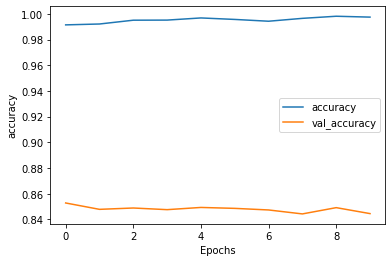

In [11]:
plot_graphs(history, 'accuracy')

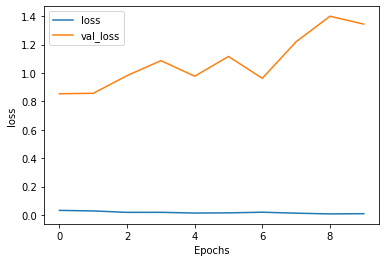

In [12]:
plot_graphs(history, 'loss')